In [9]:
print("Water Quality Prediction!")


Water Quality Prediction!


In [3]:
import pandas as pd

df = pd.read_csv("water_potability.csv")
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# Dataset ke shape dekhna
df.shape

# Dataset ka full info dekhna
df.info()

# Missing value check karna
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df = df.fillna(df.mean())


Matplotlib is building the font cache; this may take a moment.


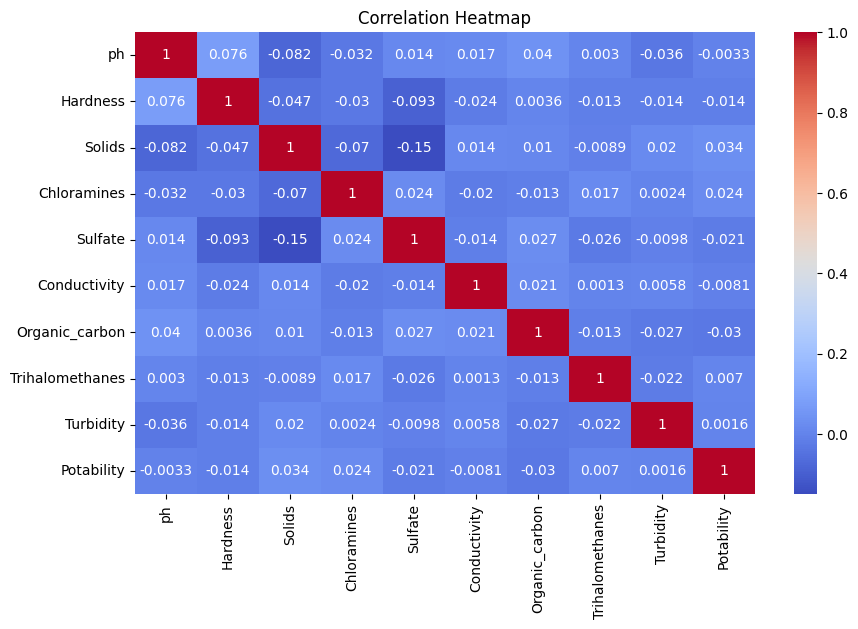

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features aur label alag karo
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train aur test data split karo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model banao
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict karo
y_pred = model.predict(X_test)

# Accuracy check karo
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7027439024390244


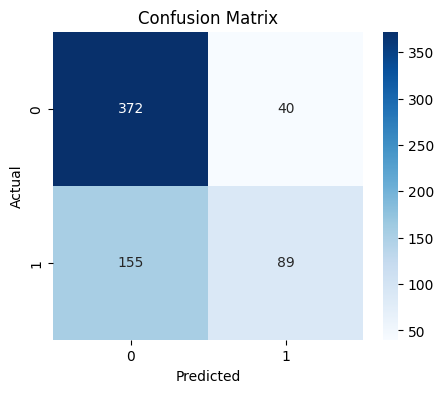

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       412
           1       0.69      0.36      0.48       244

    accuracy                           0.70       656
   macro avg       0.70      0.63      0.63       656
weighted avg       0.70      0.70      0.68       656



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


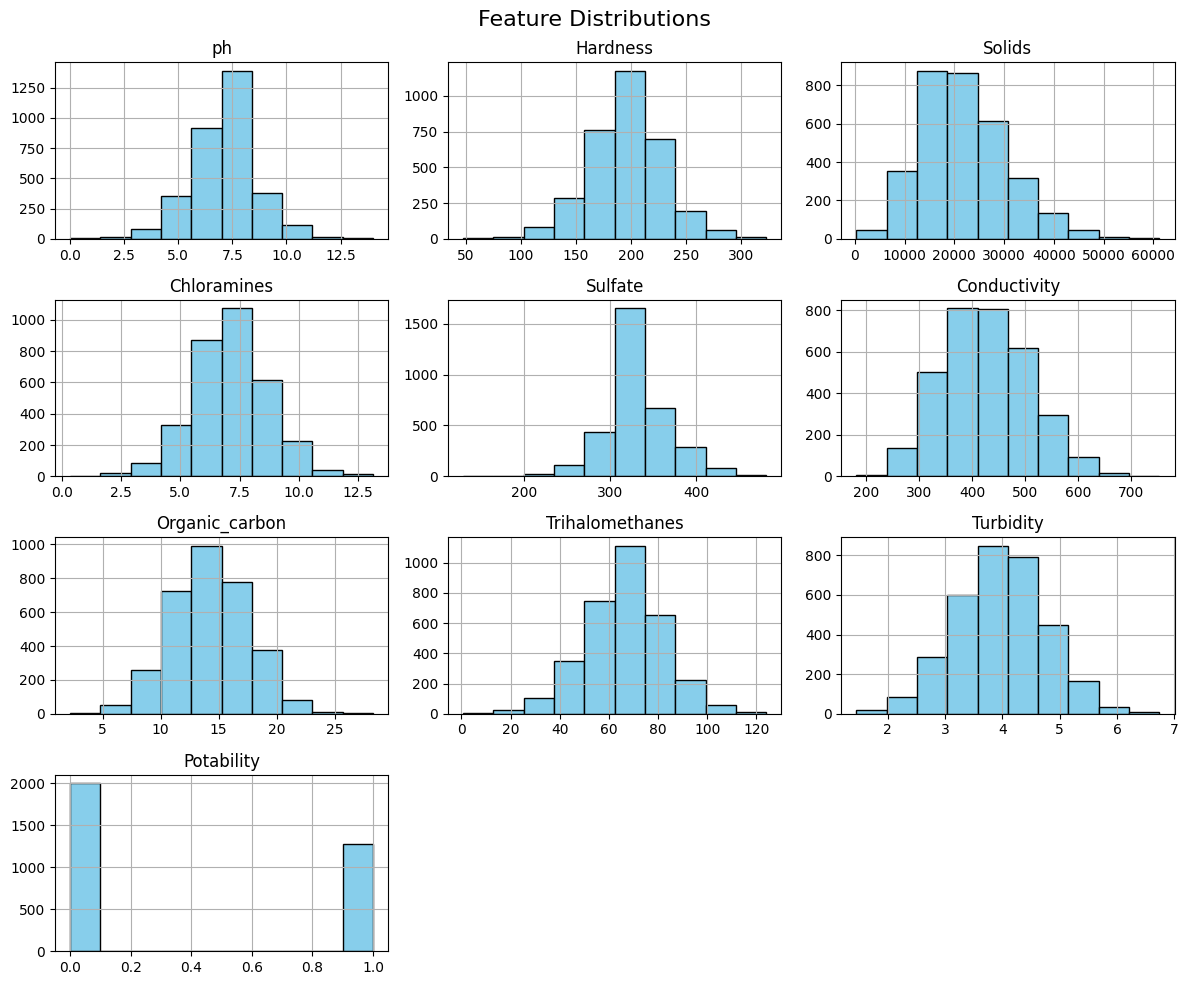

In [11]:
# Histogram of each feature
df.hist(figsize=(12,10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


## Final Summary

- Dataset me **3276** samples the.
- Data clean kiya (missing values fill).
- Random Forest model se prediction kiya.
- Accuracy **~70%** aayi.
- Confusion Matrix aur classification report se model ka performance check kiya.
- Conclusion: Model water potability predict kar sakta hai based on chemical features.
